# Understanding GRU Networks
In this article, I will try to give a fairly simple and understandable explanation of one really fascinating type of neural network. Introduced by Cho, et al. in 2014, GRU (Gated Recurrent Unit) aims to solve the vanishing gradient problem which comes with a standard recurrent neural network. GRU can also be considered as a variation on the LSTM because both are designed similarly and, in some cases, produce equally excellent results. If you are not familiar with Recurrent Neural Networks, I recommend reading my brief introduction. For a better understanding of LSTM, many people recommend Christopher Olah’s article. I would also add this paper which gives a clear distinction between GRU and LSTM.

## How do GRUs work?
As mentioned above, GRUs are improved version of standard recurrent neural network. But what makes them so special and effective?
To solve the vanishing gradient problem of a standard RNN, GRU uses, so-called, update gate and reset gate. Basically, these are two vectors which decide what information should be passed to the output. The special thing about them is that they can be trained to keep information from long ago, without washing it through time or remove information which is irrelevant to the prediction.

To explain the mathematics behind that process we will examine a single unit from the following recurrent neural network:

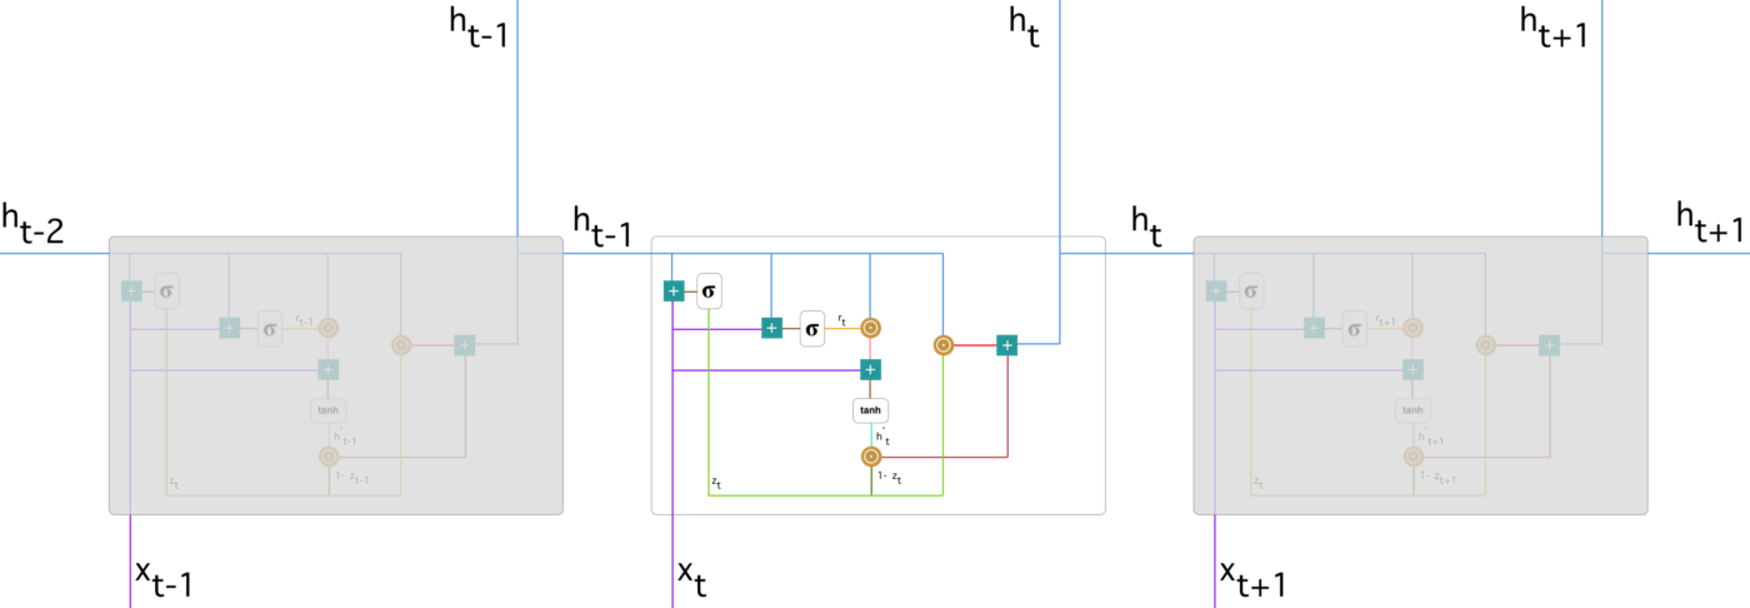

Recurrent neural network with Gated Recurrent Unit
Here is a more detailed version of that single GRU:

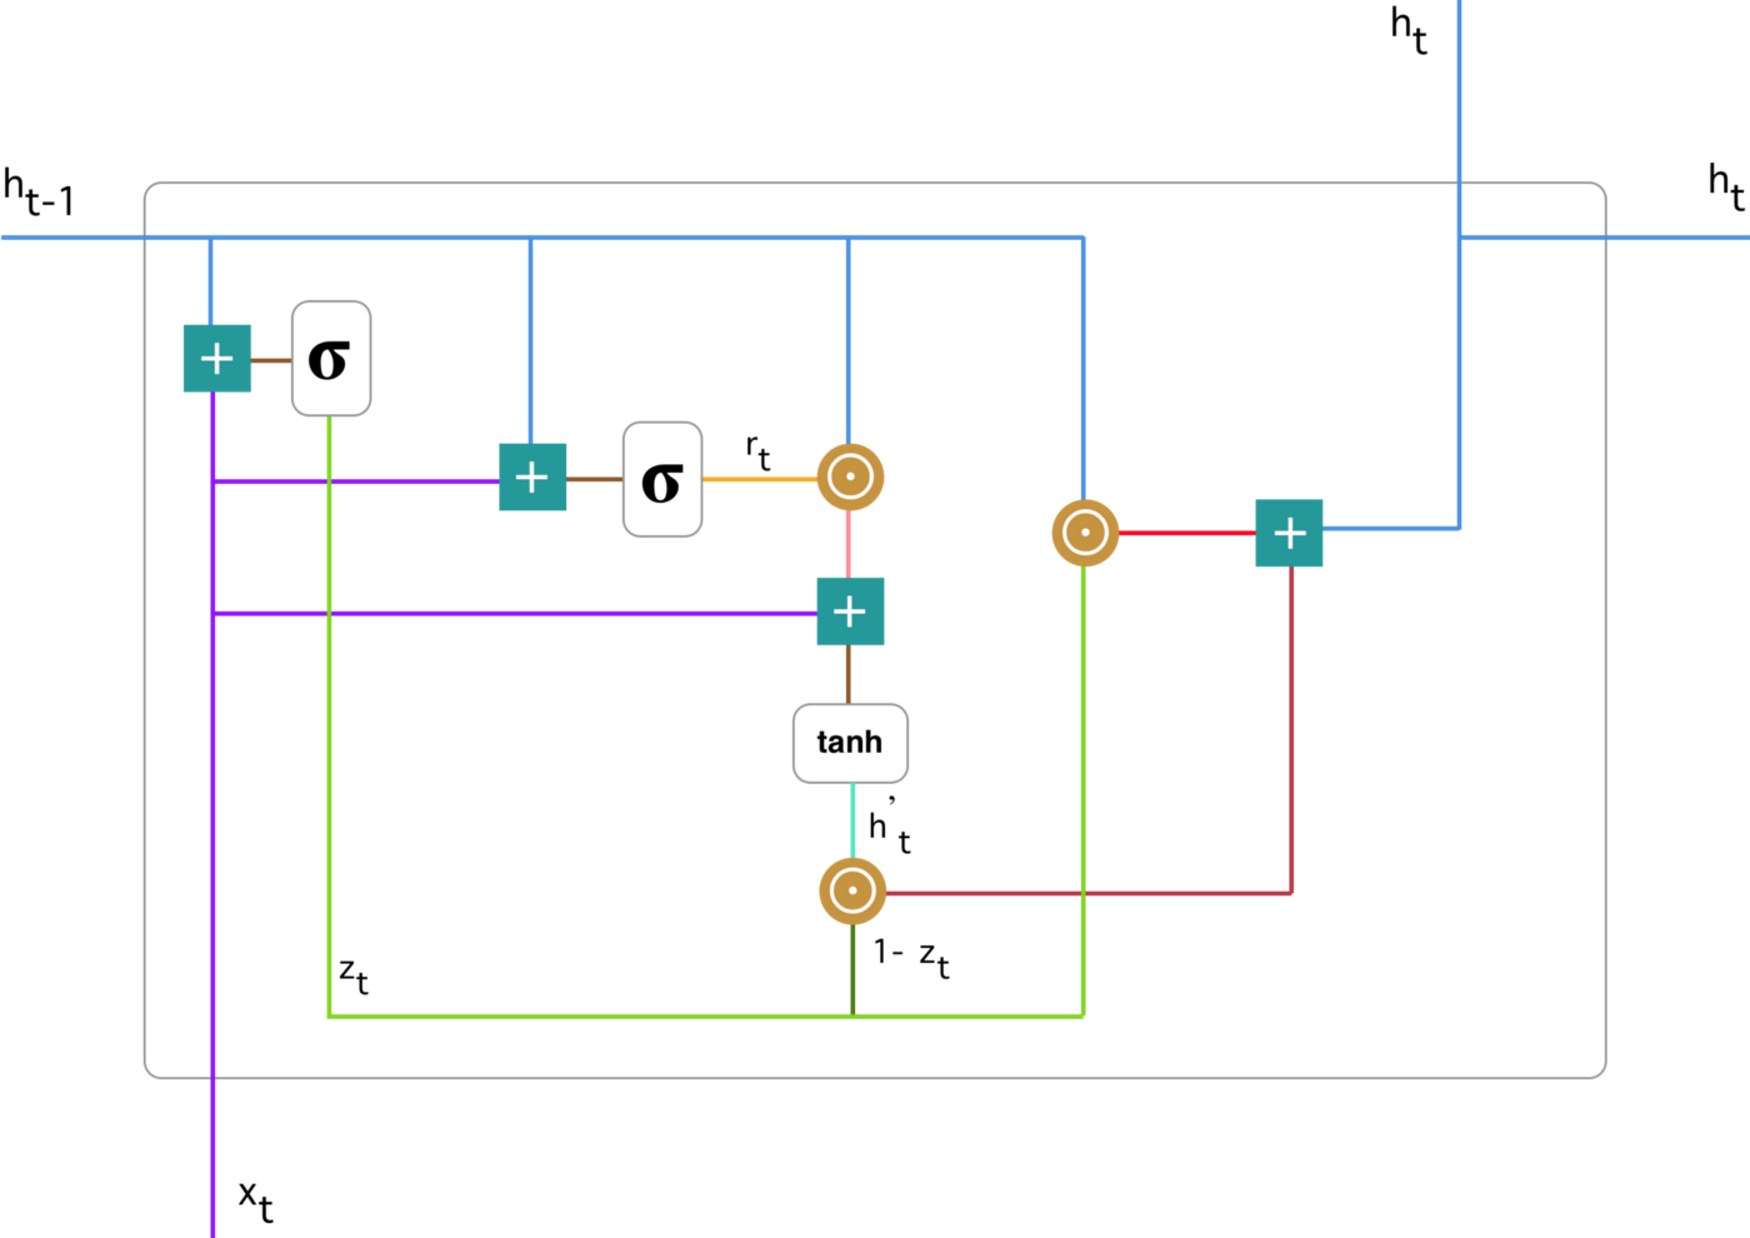

Gated Recurrent Unit
First, let’s introduce the notations:

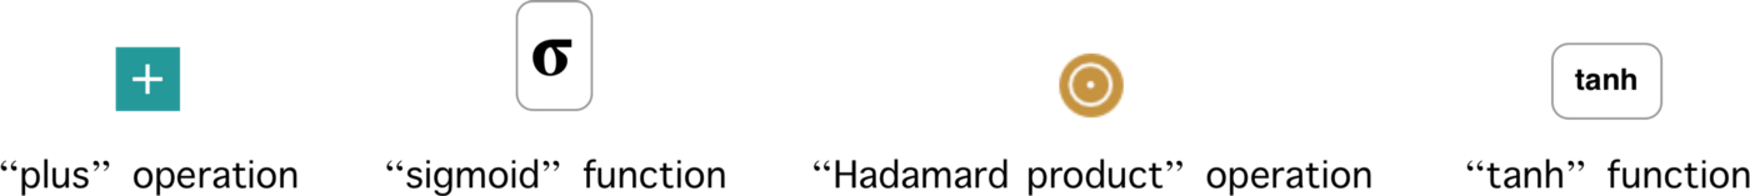

If you are not familiar with the above terminology, I recommend watching these tutorials about “sigmoid” and “tanh” function and “Hadamard product” operation.

### Update gate
We start with calculating the update gate z_t for time step t using the formula:

$$ z_t = \sigma (W^{(z)}x_t + U^{(z)}h_{t-1}) $$

When $x_t$ is plugged into the network unit, it is multiplied by its own weight $W_{(z)}$. The same goes for $h_{t-1}$ which holds the information for the previous $t-1$ units and is multiplied by its own weight $U^{(z)}$. Both results are added together and a sigmoid activation function is applied to squash the result between 0 and 1. Following the above schema, we have:

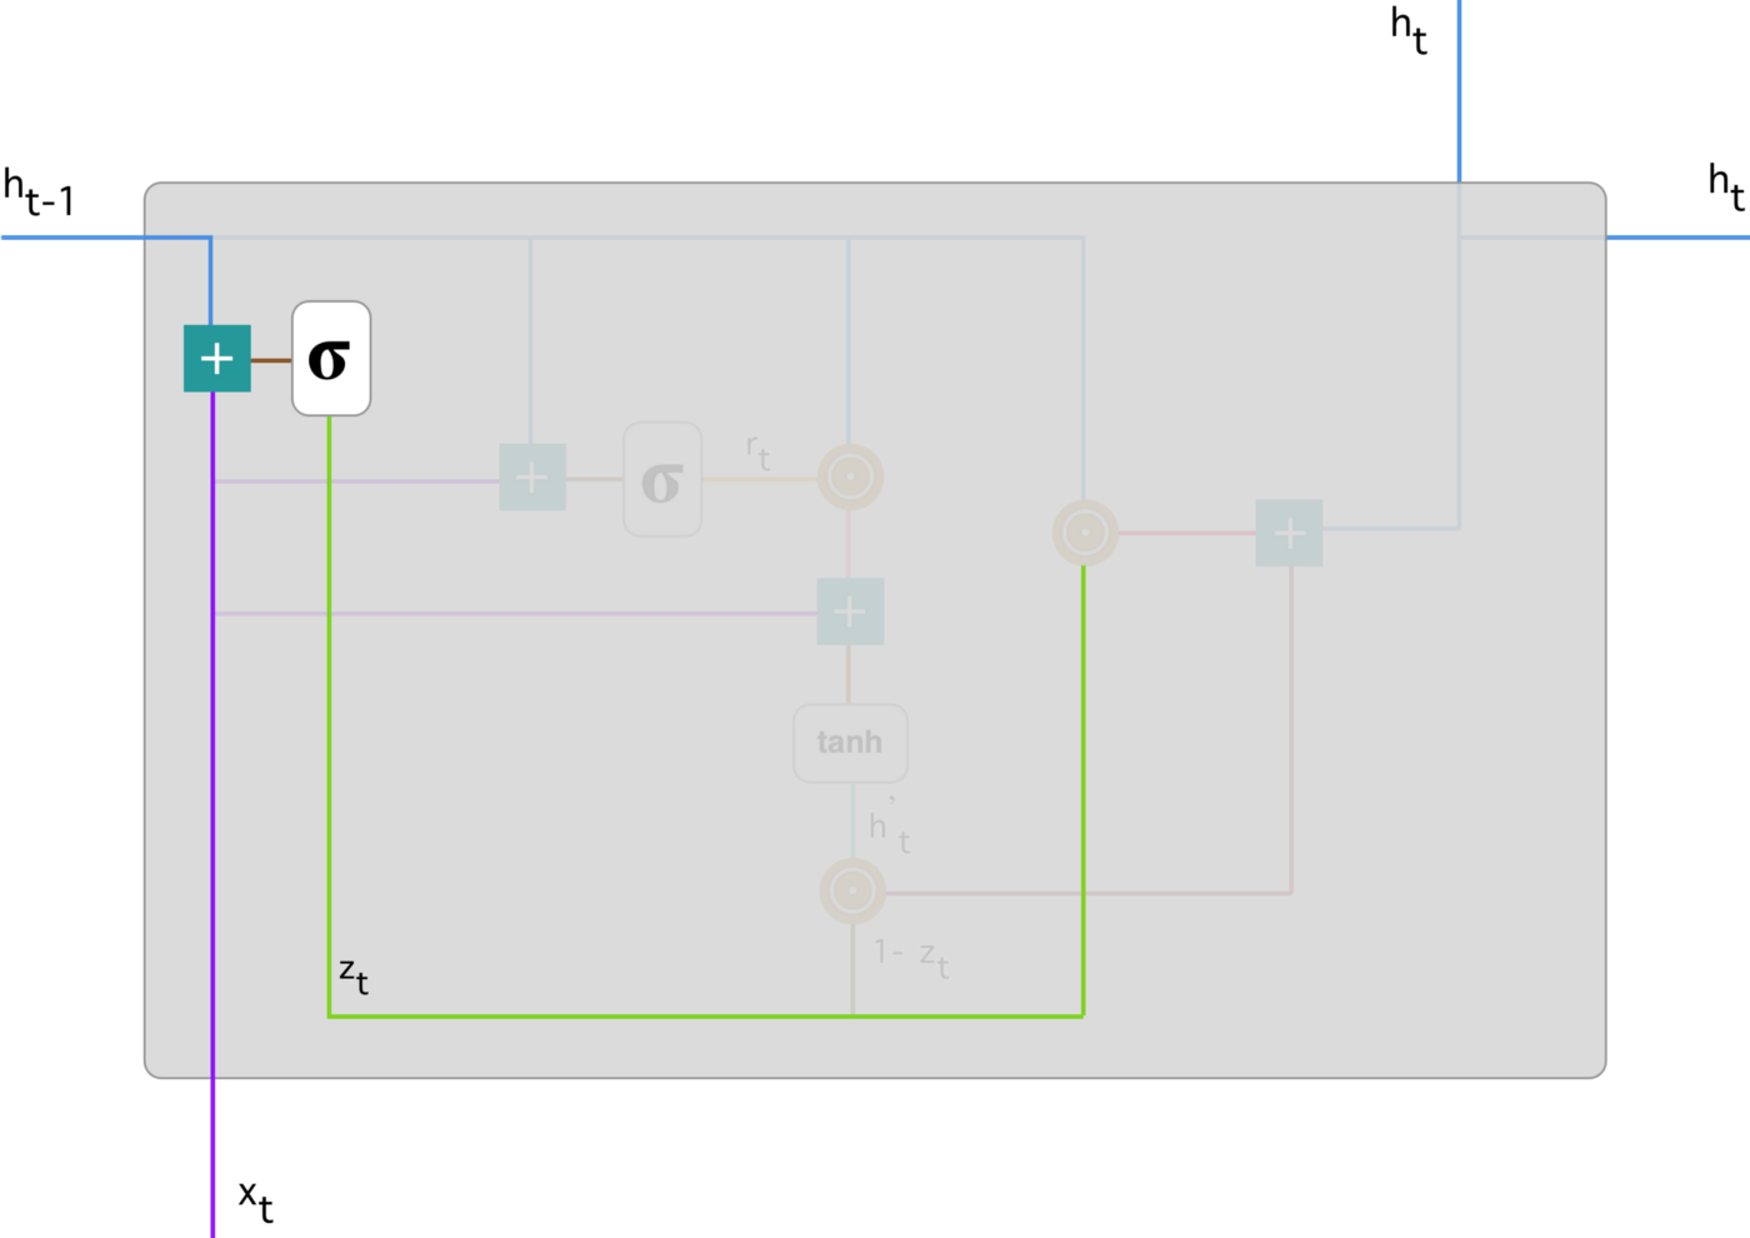

**The update gate helps the model to determine how much of the past information (from previous time steps) needs to be passed along to the future.** That is really powerful because the model can decide to copy all the information from the past and eliminate the risk of vanishing gradient problem. We will see the usage of the update gate later on. For now remember the formula for z_t.

### Reset gate
Essentially, this gate is used from the model to decide how much of the past information to forget. To calculate it, we use:

$$ r_t = \sigma (W^{(r)}x_t + U^{(r)}h_{t-1}) $$

This formula is the same as the one for the update gate. The difference comes in the weights and the gate’s usage, which will see in a bit. The schema below shows where the reset gate is:

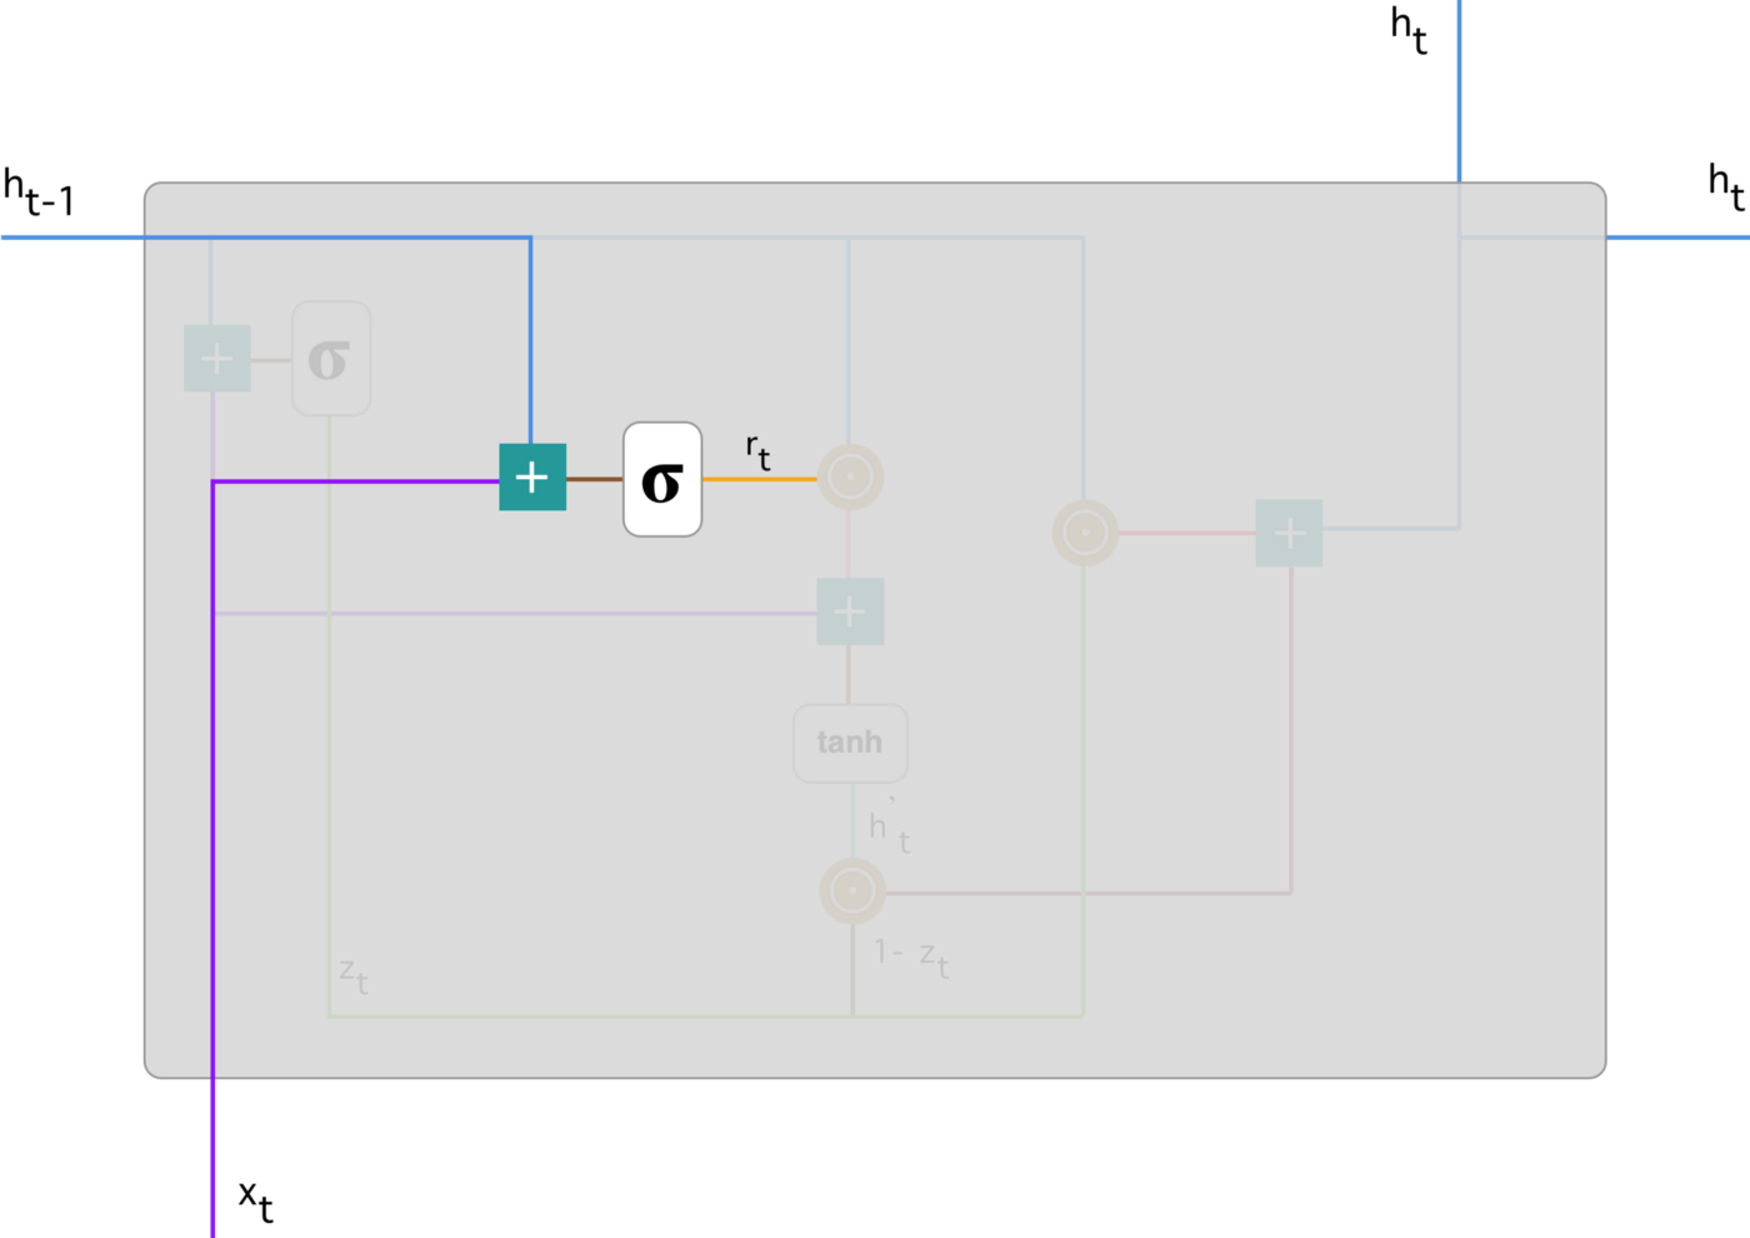

As before, we plug in $h_{t-1}$ — blue line and $x_t$ — purple line, multiply them with their corresponding weights, sum the results and apply the sigmoid function.


### Current memory content
Let’s see how exactly the gates will affect the final output. First, we start with the usage of the reset gate. We introduce a new memory content which will use the reset gate to store the relevant information from the past. It is calculated as follows:

$$ h^{'}_{t} = tanh(Wx_t + r_t.Uh_{t-1}) $$

- Multiply the input $x_t$ with a weight W and $h_{t-1}$ with a weight U.
- Calculate the Hadamard (element-wise) product between the reset gate $r_t$ and $Uh_{t-1}$. That will determine what to remove from the previous time steps. Let’s say we have a sentiment analysis problem for determining one’s opinion about a book from a review he wrote. The text starts with “This is a fantasy book which illustrates…” and after a couple paragraphs ends with “I didn’t quite enjoy the book because I think it captures too many details.” To determine the overall level of satisfaction from the book we only need the last part of the review. In that case as the neural network approaches to the end of the text it will learn to assign $r_t$ vector close to 0, washing out the past and focusing only on the last sentences.
- Sum up the results of step 1 and 2.
- Apply the nonlinear activation function tanh.

You can clearly see the steps here:

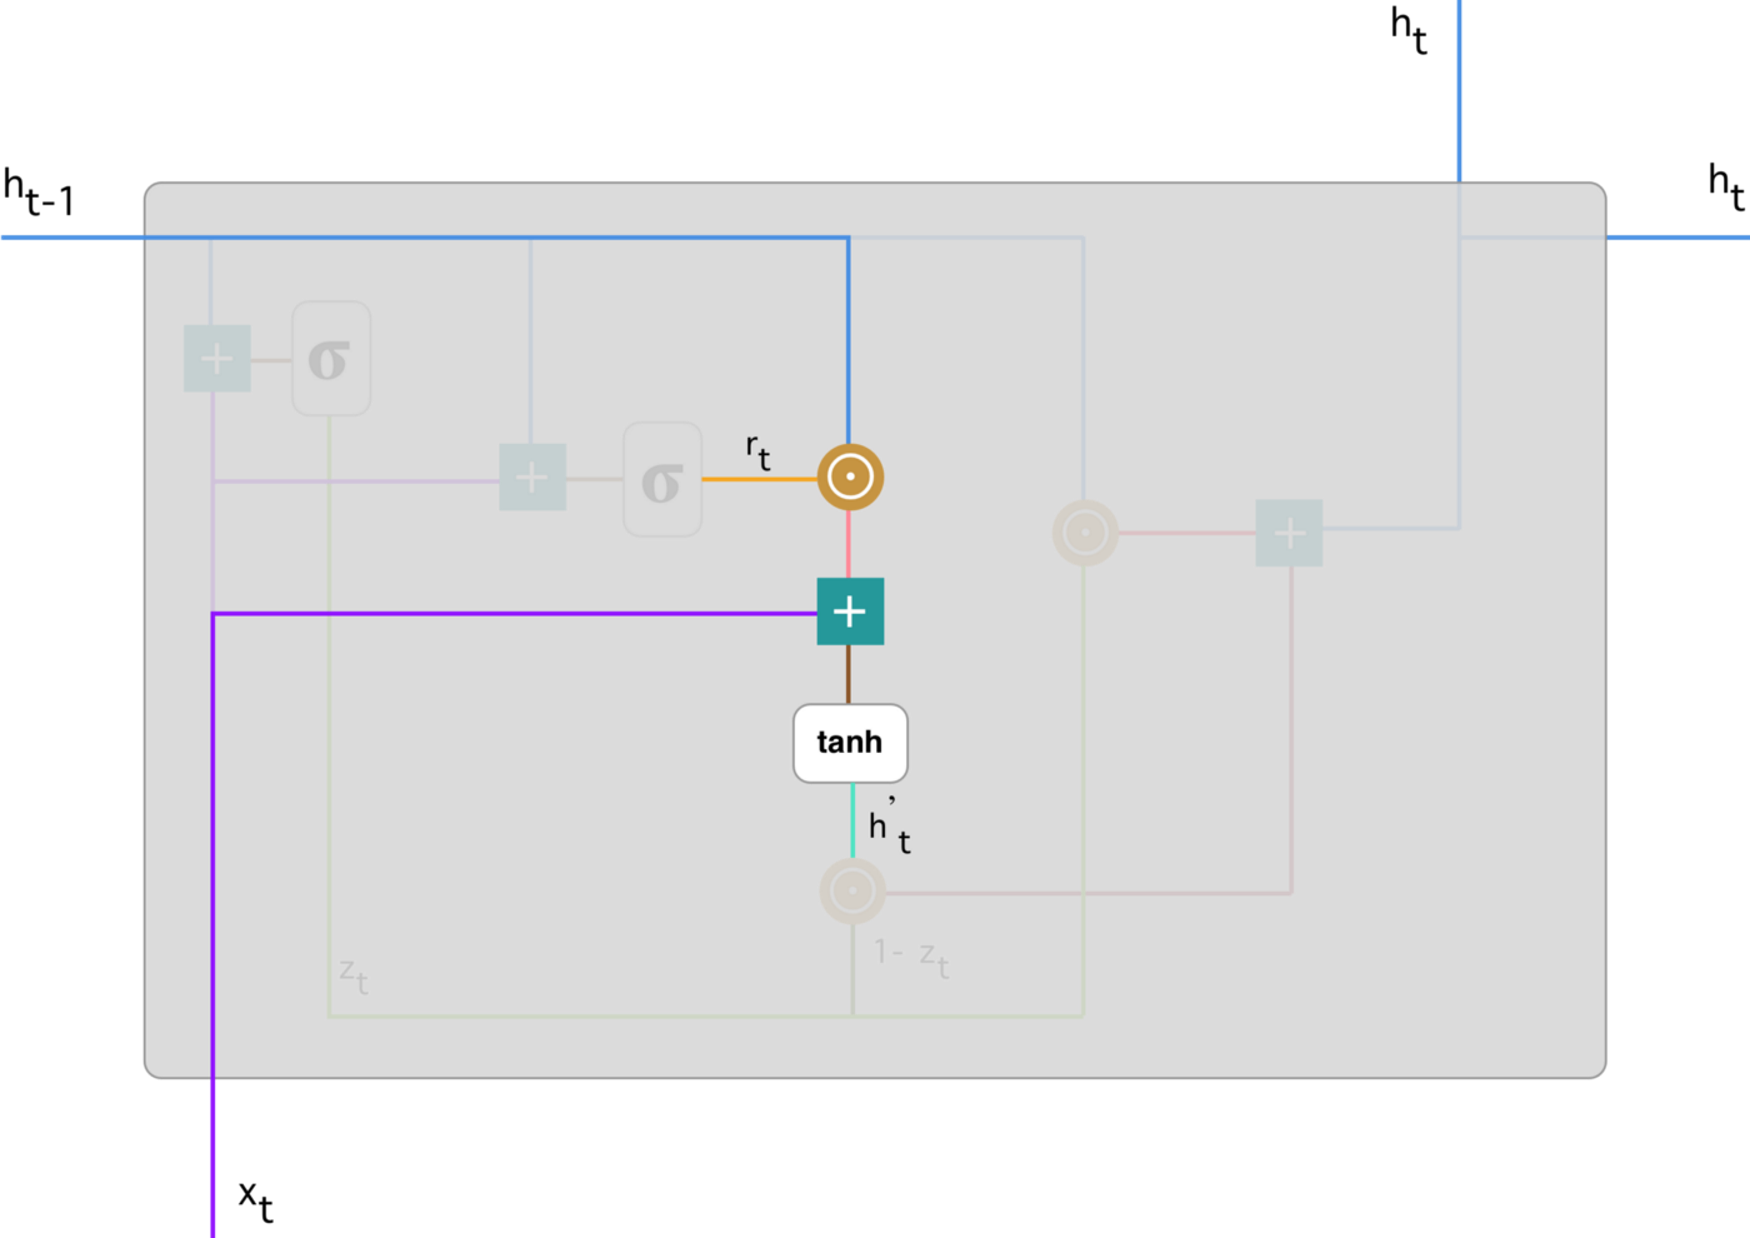

We do an element-wise multiplication of $h_{t-1}$ — blue line and $r_t$ — orange line and then sum the result — pink line with the input $x_t$ — purple line. Finally, tanh is used to produce $h_{t}^{'}$ — bright green line.
- Final memory at current time step<br>
As the last step, the network needs to calculate $h_t$ — vector which holds information for the current unit and passes it down to the network. In order to do that the update gate is needed. It determines what to collect from the current memory content — $h_{t}^{'}$ and what from the previous steps — $h_{t-1}$. That is done as follows:

$$ h^{'}_{t} = z_t.h_{t-1} + (1 - z_t).r_t.Uh_{t-1}) $$

        1. Apply element-wise multiplication to the update gate $z_t$ and $h_{t-1}$.
        2. Apply element-wise multiplication to $(1-z_t)$ and $h^{'}_{t}$.
        3. Sum the results from step 1 and 2.

Let’s bring up the example about the book review. This time, the most relevant information is positioned in the beginning of the text. The model can learn to set the vector z_t close to 1 and keep a majority of the previous information. Since z_t will be close to 1 at this time step, 1-z_t will be close to 0 which will ignore big portion of the current content (in this case the last part of the review which explains the book plot) which is irrelevant for our prediction.
Here is an illustration which emphasises on the above equation:<br>

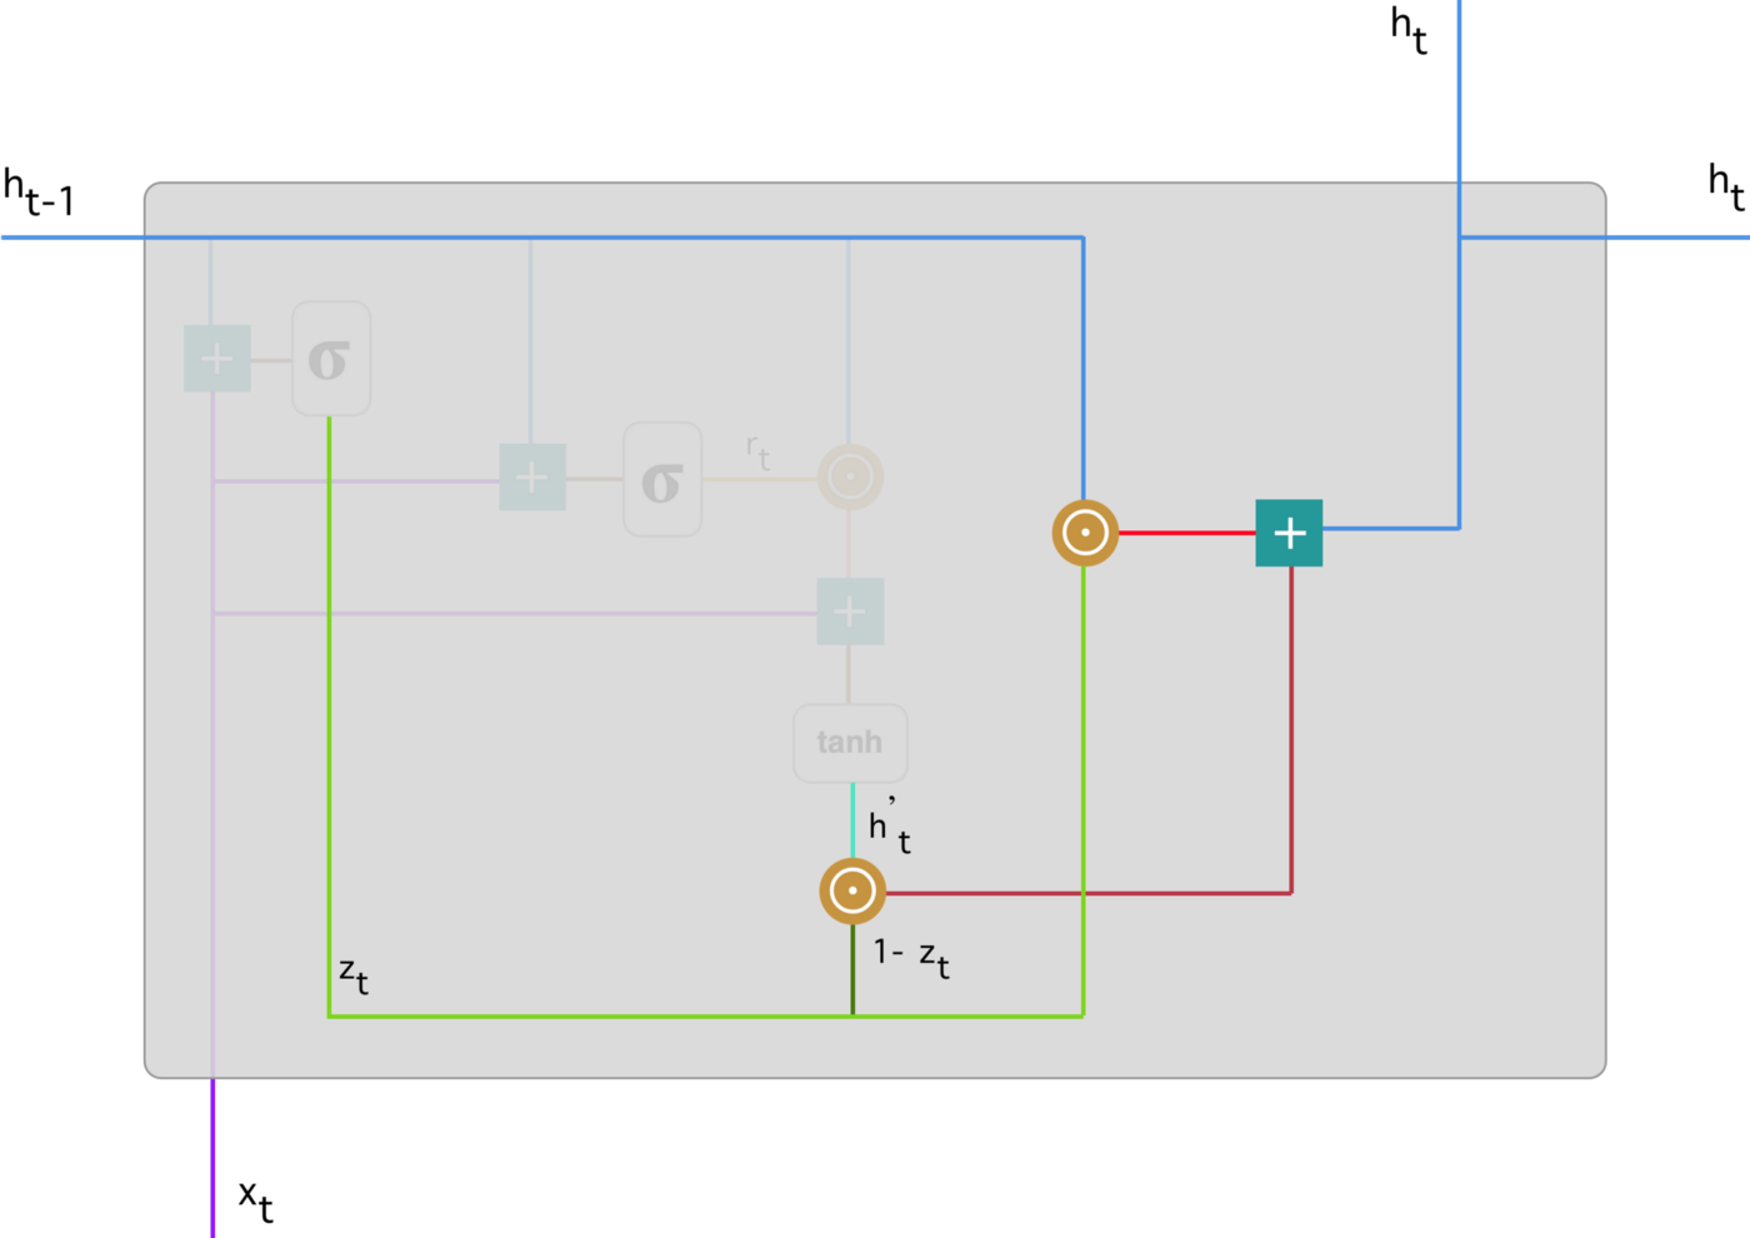

Following through, you can see how z_t — green line is used to calculate 1-z_t which, combined with h’_t — bright green line, produces a result in the dark red line. z_t is also used with h_(t-1) — blue line in an element-wise multiplication. Finally, h_t — blue line is a result of the summation of the outputs corresponding to the bright and dark red lines.<br>

Now, you can see how GRUs are able to store and filter the information using their update and reset gates. That eliminates the vanishing gradient problem since the model is not washing out the new input every single time but keeps the relevant information and passes it down to the next time steps of the network. If carefully trained, they can perform extremely well even in complex scenarios.
I hope the article is leaving you armed with a better understanding of this state-of-the-art deep learning model called GRU.